In [2]:
#The name of this project is 'Cryptara' and the objective of this script is to build a Robo-advisor
name = input("Welcome Crypto Investor, what is your name?")

Welcome Crypto Investor, what is your name? AP


In [3]:
if name != "" or name == None:
    # If so, write a print with a string of "Hello" concatenated with the variable `name`.
    print(f"Hello {name}, my name is Cryptara. I make your savings go to good use in the Crypto market..")
    print(f"Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?")
    print('')
    data_source=input("type: import or input")
    investment_value=input("how much would you like to invest?")
    print('')
    print(f'Once I have your list, This process starts automatically..')
    print(f'I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time')
    print(f"Then, I run hundreds of simulations to determine optimal weights for each crypto selection")
    print(f"From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'")
    print(f"Lastly, I will present to you an interactive Dashboard based on future projections..")

Hello AP, my name is Cryptara. I make your savings go to good use in the Crypto market..
Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?



type: import or input import
how much would you like to invest? 150000



Once I have your list, This process starts automatically..
I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time
Then, I run hundreds of simulations to determine optimal weights for each crypto selection
From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'
Lastly, I will present to you an interactive Dashboard based on future projections..


In [4]:
if data_source == 'input':
    ticker_1=input("Tell me the first ticker")
    ticker_2=input("Tell me the second ticker")
    ticker_3=input("Tell me the third ticker")
    ticker_4=input("Tell me the fourth ticker")
#OPEN define input option, user can either import csv file or input their tickers directly.
#Let user insert their tickers for the week:
#print(f"Tell me {name}, what are your favoriate cryptos this week?")
#crypto_one = (input("enter the ticker of your first choice:"))
#crypto_two = input("enter the ticker of your second choice:")
print(f'Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..')
#OR USE LIST IMPORT
#ticker_data = Path("../crypto_thirtysix.csv")
#ticker= pd.read_csv(ticker_data, header=None)

Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..


In [5]:
#Import libraries and dependencies
from dotenv import load_dotenv
from itertools import product
import datetime
import os
import logging
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [6]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [7]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

INFO:tvDatafeed.main:refreshing tradingview token using selenium
DEBUG:tvDatafeed.main:launching chrome
DEBUG:tvDatafeed.main:chromedriver in headless mode
DEBUG:selenium.webdriver.remote.remote_connection:POST http://127.0.0.1:52344/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:loggingPrefs": {"performance": "ALL"}, "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu", "user-data-dir=C:\\Users\\Aaron\\.tv_datafeed/chrome"]}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:loggingPrefs": {"performance": "ALL"}, "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu", "user-data-dir=C:\\Users\\Aaron\\.tv_datafeed/chrome"]}}}
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 127.0.0.1:52344
DEBUG:urllib3.connectionpool:http://127.0.0.1:52344 "POST /session HTTP/1.1" 200 759
DEBUG:selenium.webdriver.remote.remote_c

In [12]:
from pathlib import Path
ticker_data = Path("../desktop/crypto_tickers1.csv")
ticker= pd.read_csv(ticker_data, header=None)
ticker_df = pd.DataFrame(ticker)
my_crypto_list = ticker_df[0].tolist()
screener="CRYPTO"
exchange="BINANCE"
df_daily = pd.DataFrame()
print(f"Nice work! No issues have been identified, let me look into these and get back to you shortly...")

Nice work! No issues have been identified, let me look into these and get back to you shortly...


In [13]:
#Get historical pricing information for total population
for ticker in my_crypto_list:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=500)
    df_daily = df_daily.append(data)
print(f'finished extracting historical prices..')

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:BTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ETHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MBOXBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBNB...
DEBUG:root:c

finished extracting historical prices..


In [16]:
#Grab indicator recommendations from Trading View API
from tradingview_ta import TA_Handler, Interval, Exchange
staging_df = pd.DataFrame()
ticker_df_daily = pd.DataFrame()
for ticker in my_crypto_list:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().summary)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        ticker_df_daily = ticker_df_daily.append(final_df)
    except:
        pass
print(f'finished extracting analyst recommendations..')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

finished extracting analyst recommendations..


In [17]:
#Filter imported list by analyst recommendations
initial_drop = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='SELL']
initial_pass_prime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='BUY']
initial_pass_subprime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='NEUTRAL']
#initial_drop = initial_indicator['RECOMMENDATION'].str.contains('SELL')
buy_count = initial_pass_prime['RECOMMENDATION'].count() + initial_pass_subprime['RECOMMENDATION'].count()
sell_count = initial_drop['RECOMMENDATION'].count()
print('Here are the initial findings:')
print('')
print(f'It is not a good time to invest in {sell_count} of the cryptos from your list')
print(f'These {sell_count} cryptos are not in a buying position')
print(initial_drop['RECOMMENDATION'])
print(f'These {sell_count} cryptos have been dropped from consideration..')
print('')
print('')
print(f'Moving on, our initial inidicator data suggest {buy_count} cryptos from your list should be considered for further analysis:')
print('Here they are:')
print('Our Prime candidates that are in buy positions are:')
print(initial_pass_prime['RECOMMENDATION'])
print('')
print('And these are neutral for now, we can resverve for later if we need additional cryptos for analysis')
print(initial_pass_subprime['RECOMMENDATION'])

Here are the initial findings:

It is not a good time to invest in 39 of the cryptos from your list
These 39 cryptos are not in a buying position
BTCUSD              SELL
ETHUSD              SELL
VGXBTC              SELL
MBOXBNB             SELL
VTHOBNB             SELL
BURGERBNB           SELL
COVERBUSD           SELL
MATICBNB            SELL
FUNBTC              SELL
GLMBTC              SELL
MDABTC              SELL
ADABTC              SELL
COVERETH            SELL
TRIBEBUSD           SELL
TRIBEUSDT           SELL
ADXBTC              SELL
WINBNB              SELL
BATETH              SELL
JUVBTC              SELL
AKROUSDT_PREMIUM    SELL
ATMBTC              SELL
DASHETH             SELL
PSGBTC              SELL
USDTBVND            SELL
DASHBNB             SELL
POLSBNB             SELL
ADAETH              SELL
BUSDBVND            SELL
LPTBTC              SELL
CLVBNB              SELL
ADXETH              SELL
FUNETH              SELL
WRXBNB              SELL
WINTRX              SELL
USDT

In [18]:
#Extract index values for the tickers that are prime and subprime and format data for further analysis. 
initial_pass_prime.reset_index(inplace=True)
initial_pass_prime = initial_pass_prime['index']
initial_pass_subprime.reset_index(inplace=True)
initial_pass_subprime = initial_pass_subprime['index']
staging_df = pd.DataFrame()
staging_df1 = pd.DataFrame()
prime_df = pd.DataFrame()
subprime_df = pd.DataFrame()
print(f'Nice work, {name}, you found {buy_count} cryptos that might be good investments this week!')
print(f'However, give me a minute while I dig into some insider techniques')

Nice work, AP, you found 77 cryptos that might be good investments this week!
However, give me a minute while I dig into some insider techniques


In [21]:
crypataras_picks

['TRXXRP', 'LPTBNB']

In [22]:
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.')
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.Here they are: {crypataras_picks}')
Dup = {}
#print(This program requires a minimum of five cryptos to run further analysis. Importing random ticker from subprime dataframe 
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_1 = subprime_df.sample().reset_index()
    ticker_random_1 = computer_selection_1.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_1])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_2 = subprime_df.sample().reset_index()
    ticker_random_2 = computer_selection_2.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_2])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_3 = subprime_df.sample().reset_index()
    ticker_random_3 = computer_selection_3.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_3])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1

2 of the cryptos from your list are in an optimal buying position.
2 of the cryptos from your list are in an optimal buying position.Here they are: ['TRXXRP', 'LPTBNB']
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..


In [23]:
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

INFO:tvDatafeed.main:refreshing tradingview token using selenium
DEBUG:tvDatafeed.main:launching chrome
DEBUG:tvDatafeed.main:chromedriver in headless mode
DEBUG:selenium.webdriver.remote.remote_connection:POST http://127.0.0.1:52031/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:loggingPrefs": {"performance": "ALL"}, "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu", "user-data-dir=C:\\Users\\Aaron\\.tv_datafeed/chrome"]}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:loggingPrefs": {"performance": "ALL"}, "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu", "user-data-dir=C:\\Users\\Aaron\\.tv_datafeed/chrome"]}}}
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 127.0.0.1:52031
DEBUG:urllib3.connectionpool:http://127.0.0.1:52031 "POST /session HTTP/1.1" 200 759
DEBUG:selenium.webdriver.remote.remote_c

In [25]:
final_crypto_df = pd.DataFrame()
bars= 100
for all_picks in crypataras_picks:
    picks_df = tv.get_hist(symbol=all_picks,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    final_crypto_df = final_crypto_df.append(picks_df)
final_crypto_df.head(5)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:WBTCETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:FETBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MINABNB...


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-13 19:00:00,BINANCE:TRXXRP,0.08080,0.08162,0.07815,0.08079,3711875.2
2021-06-14 19:00:00,BINANCE:TRXXRP,0.08091,0.08284,0.08050,0.08258,5602077.8
2021-06-15 19:00:00,BINANCE:TRXXRP,0.08261,0.08390,0.08213,0.08295,4444619.5
2021-06-16 19:00:00,BINANCE:TRXXRP,0.08290,0.08785,0.08174,0.08766,12005383.2
2021-06-17 19:00:00,BINANCE:TRXXRP,0.08765,0.08910,0.08579,0.08709,10038092.6


In [26]:
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
final_df_cleaner = final_crypto_df
final_df_cleaner[['exchange', 'ticker']] = final_df_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
final_df_cleaner = final_df_cleaner[['ticker','close']]
final_df_cleaner = final_df_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
final_df_cleaner = final_df_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
print('Extracted historical returns into dataframe..')
crypto_pick_returns = final_df_cleaner.pct_change().dropna()
crypto_pick_returns.tail(5)

Extracted historical returns into dataframe..


ticker,FETBTC,LPTBNB,MINABNB,TRXXRP,WBTCETH
datetime,,,,,
2021-09-16 19:00:00,-0.084426,0.054751,-0.053086,-0.074029,0.039582
2021-09-17 19:00:00,-0.006300,-0.007722,0.014212,-0.001925,0.010776
2021-09-18 19:00:00,-0.065706,-0.040208,0.019122,0.002843,0.008529
2021-09-19 19:00:00,-0.022825,0.053378,-0.054239,0.005669,0.018323
2021-09-20 19:00:00,-0.032828,-0.007056,-0.016546,-0.004429,-0.004152


In [27]:
#Step5: Calculate Cumulative Returns
print('Calculated cumulative returns..')
cumulative_daily_returns = (1 + crypto_pick_returns).cumprod() -1
cumulative_daily_returns.tail(10)

Calculated cumulative returns..


ticker,FETBTC,LPTBNB,MINABNB,TRXXRP,WBTCETH
datetime,,,,,
2021-09-11 19:00:00,0.911,-0.128555,0.417694,0.151536,-0.068165
2021-09-12 19:00:00,1.000,-0.159720,0.674922,0.125385,-0.057137
2021-09-13 19:00:00,0.926,-0.137904,0.713167,0.232271,-0.053691
2021-09-14 19:00:00,0.972,-0.138099,0.589103,0.229873,-0.081260
2021-09-15 19:00:00,0.907,-0.139073,0.549361,0.217083,-0.077125
2021-09-16 19:00:00,0.746,-0.091936,0.467112,0.126984,-0.040595
2021-09-17 19:00:00,0.735,-0.098948,0.487962,0.124814,-0.030257
2021-09-18 19:00:00,0.621,-0.135177,0.516415,0.128012,-0.021986
2021-09-19 19:00:00,0.584,-0.089014,0.434167,0.134407,-0.004066


In [30]:
#Step5: Calculate Cumulative Returns
print('Activating Cryptara Smartfolio')
print('Logging returns to normalize dataset..')
log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

Activating Cryptara Smartfolio
Logging returns to normalize dataset..


ticker,FETBTC,LPTBNB,MINABNB,TRXXRP,WBTCETH
datetime,,,,,
2021-09-16 19:00:00,-0.293030,NaN,-0.761186,-2.063693,NaN
2021-09-17 19:00:00,-0.307885,NaN,-0.717517,-2.080927,NaN
2021-09-18 19:00:00,-0.476424,NaN,-0.660844,-2.055632,NaN
2021-09-19 19:00:00,-0.537854,NaN,-0.834327,-2.006885,NaN
2021-09-20 19:00:00,-0.631112,NaN,-0.890534,-2.044984,NaN


In [31]:
#Calculate volatility and 
print(f'Running multiple scenaries to determine appropriate weights for selected cryptos')
#Initialize variables for 
num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,len(crypataras_picks)))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)
expected_return
mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(len(crypataras_picks)))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]

Running multiple scenaries to determine appropriate weights for selected cryptos


In [44]:
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]

array([0.03146969, 0.32358721, 0.24767544, 0.30680788, 0.09045977])

In [43]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
portfolio_weights = np.array([weight[max_index,:]])
smartfolio_weights = pd.DataFrame(portfolio_weights)
smartfolio_weights.to_csv('smartfolio_weights.csv')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002154E14ECD0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002154E14ECD0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


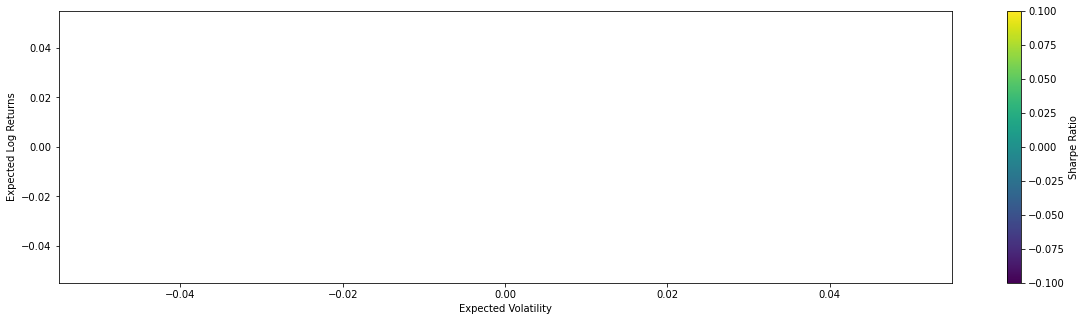

here are the smartfolio weights:         0         1         2         3        4
0  0.03147  0.323587  0.247675  0.306808  0.09046


In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()
print(f'here are the smartfolio weights:{smartfolio_weights}')

In [25]:
#END OF DRAFT. INCLUDE AARON SIMULATION DATA

In [45]:
import itertools
from itertools import product
from MCForecastTools import MCSimulation
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [27]:
#mcsims_df_modified = mcsims_df['symbol','open','high','low','close','volume']
#headers = ['symbol','open','high','low','close','volume']
#mcsims_df = mcsims_df.rename(columns=headers)
#mcsims_df.reset_index(inplace=True)
#mcsims_df.set_index('datetime')
#mcsims_df = mcsims_df['datetime','symbol','close','high','low','open','volume']
#mcsims_df
#neworder = ['symbol','close','high','low','open','volume']
#mcsims_df=mcsims_df.reindex(columns=neworder)
#mcsims_df

In [47]:
mcsims_df = pd.DataFrame()
for final_cryptos in crypataras_picks:
    mcsims = tv.get_hist(symbol=final_cryptos,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    mcsims_df = mcsims_df.append(mcsims)

#mcsims_df[['exchange', 'ticker']] = mcsims_df['symbol'].str.split(':',expand=True)
#mcsims_df.reset_index(inplace=True)
#neworder = ['datetime','symbol','close','high','low','open','volume','exchange','ticker']
#mcsims_df=mcsims_df.reindex(columns=neworder)
#mcsims_df.drop(columns=['symbol','exchange'],inplace=True)
#mcsims_df = mcsims_df.set_index(['datetime','ticker']).unstack().swaplevel(0,1,1).sort_index(1)
mcsims_df.head()

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LPTBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:WBTCETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:FETBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MINABNB...


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-06-13 19:00:00,BINANCE:TRXXRP,0.08080,0.08162,0.07815,0.08079,3711875.2
2021-06-14 19:00:00,BINANCE:TRXXRP,0.08091,0.08284,0.08050,0.08258,5602077.8
2021-06-15 19:00:00,BINANCE:TRXXRP,0.08261,0.08390,0.08213,0.08295,4444619.5
2021-06-16 19:00:00,BINANCE:TRXXRP,0.08290,0.08785,0.08174,0.08766,12005383.2
2021-06-17 19:00:00,BINANCE:TRXXRP,0.08765,0.08910,0.08579,0.08709,10038092.6


In [74]:
f'{exchange}' + ':' +f'{crypataras_picks[0]}'

BINANCE:TRXXRP


In [77]:
ticker1_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[0]}']
ticker2_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[1]}']
ticker3_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[2]}']
ticker4_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[3]}']
ticker5_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[4]}']
sim_data = pd.concat([ticker1_df, ticker2_df, ticker3_df, ticker4_df, ticker5_df], axis='columns', join='inner')

In [84]:
sim_data.head()

,symbol,open,high,low,close,volume,symbol,open,high,low,...,high,low,close,volume,symbol,open,high,low,close,volume
datetime,,,,,,,,,,,,,,,,,,,,,
2021-08-09 19:00:00,BINANCE:TRXXRP,0.09030,0.09215,0.08684,0.08757,5350241.7,BINANCE:LPTBNB,0.05290,0.05513,0.05032,...,0.000010,0.000009,0.000010,21150596.0,BINANCE:MINABNB,0.007073,0.011000,0.007073,0.008681,1245239.3
2021-08-10 19:00:00,BINANCE:TRXXRP,0.08745,0.09468,0.07839,0.08246,18304355.7,BINANCE:LPTBNB,0.05119,0.05243,0.04580,...,0.000012,0.000010,0.000011,40397558.0,BINANCE:MINABNB,0.008676,0.008938,0.007359,0.007428,413877.6
2021-08-11 19:00:00,BINANCE:TRXXRP,0.08261,0.08872,0.08165,0.08727,13183488.5,BINANCE:LPTBNB,0.04704,0.04836,0.04618,...,0.000012,0.000010,0.000011,15698975.0,BINANCE:MINABNB,0.007428,0.007650,0.006989,0.007398,201022.0
2021-08-12 19:00:00,BINANCE:TRXXRP,0.08729,0.09000,0.07920,0.08191,9207937.9,BINANCE:LPTBNB,0.04731,0.04877,0.04650,...,0.000012,0.000011,0.000011,7313430.0,BINANCE:MINABNB,0.007381,0.007963,0.007164,0.007662,118870.9
2021-08-13 19:00:00,BINANCE:TRXXRP,0.08226,0.08281,0.07045,0.07235,11785472.4,BINANCE:LPTBNB,0.04670,0.05155,0.04621,...,0.000011,0.000011,0.000011,4833751.0,BINANCE:MINABNB,0.007668,0.007687,0.007140,0.007310,95298.9


In [85]:
mdex = itertools.product(crypataras_picks, ticker1_df.columns)
columns = []
for x in mdex:
 columns.append(x)
sim_data.columns = pd.MultiIndex.from_tuples(columns) 

In [86]:
sim_data.head()

TRXXRP                                      \
                             symbol     open     high      low    close   
datetime                                                                  
2021-08-09 19:00:00  BINANCE:TRXXRP  0.09030  0.09215  0.08684  0.08757   
2021-08-10 19:00:00  BINANCE:TRXXRP  0.08745  0.09468  0.07839  0.08246   
2021-08-11 19:00:00  BINANCE:TRXXRP  0.08261  0.08872  0.08165  0.08727   
2021-08-12 19:00:00  BINANCE:TRXXRP  0.08729  0.09000  0.07920  0.08191   
2021-08-13 19:00:00  BINANCE:TRXXRP  0.08226  0.08281  0.07045  0.07235   

                                         LPTBNB                             \
                         volume          symbol     open     high      low   
datetime                                                                     
2021-08-09 19:00:00   5350241.7  BINANCE:LPTBNB  0.05290  0.05513  0.05032   
2021-08-10 19:00:00  18304355.7  BINANCE:LPTBNB  0.05119  0.05243  0.04580   
2021-08-11 19:00:00  13183488.5  BINANCE:LPTBNB  0.04704  0.04836  0.04618   
2021-08-12 19:00:00   9207937.9  BINANCE:LPTBNB  0.04731  0.04877  0.04650   
2021-08-13 19:00:00  11785472.4  BINANCE:LPTBNB  0.04670  0.05155  0.04621   

                     ...    FETBTC                                  \
                     ...      high       low     close      volume   
datetime             ...                                             
2021-08-09 19:00:00  ...  0.000010  0.000009  0.000010  21150596.0   
2021-08-10 19:00:00  ...  0.000012  0.000010  0.000011  40397558.0   
2021-08-11 19:00:00  ...  0.000012  0.000010  0.000011  15698975.0   
2021-08-12 19:00:00  ...  0.000012  0.000011  0.000011   7313430.0   
2021-08-13 19:00:00  ...  0.000011  0.000011  0.000011   4833751.0   

                             MINABNB                                          \
                              symbol      open      high       low     close   
datetime                                                                       
2021-08-09 19:00:00  BINANCE:MINABNB  0.007073  0.011000  0.007073  0.008681   
2021-08-10 19:00:00  BINANCE:MINABNB  0.008676  0.008938  0.007359  0.007428   
2021-08-11 19:00:00  BINANCE:MINABNB  0.007428  0.007650  0.006989  0.007398   
2021-08-12 19:00:00  BINANCE:MINABNB  0.007381  0.007963  0.007164  0.007662   
2021-08-13 19:00:00  BINANCE:MINABNB  0.007668  0.007687  0.007140  0.007310   

                                
                        volume  
datetime                        
2021-08-09 19:00:00  1245239.3  
2021-08-10 19:00:00   413877.6  
2021-08-11 19:00:00   201022.0  
2021-08-12 19:00:00   118870.9  
2021-08-13 19:00:00    95298.9  

[5 rows x 30 columns]

mcsims_df.to_csv('updated_delete.csv')

In [93]:
MC_even_dist = MCSimulation(
    portfolio_data = sim_data, 
    weights = [.20, .20, .20, .20, .20],
    num_simulation=100,
    num_trading_days = 126
)

Cumula_return = MC_even_dist.calc_cumulative_return()

In [94]:
Cumula_return = MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
